# Introductory examples

### ** plot이 잘 그려지는지 테스트

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


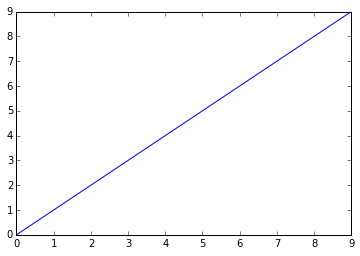

In [7]:
import pandas
plot(arange(10))

## <div style="font-weight: bold; color: blue">Exercise 1. usa.gov data from bit.ly</div>

#### .gov or .mil를 shorten한 사람의 데이터를 분석해봅시다.

### 1.1 Converting a JSON string into a Python dictionary object

In [5]:
%pwd

u'/home/kwangyounjung/Workspace/python-study/study_session/book/python_for_data_analysis'

In [6]:
''' JSON format '''
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [7]:
''' Read the first line '''
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [8]:
''' Converting a JSON string into a Python dictionary object '''
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [9]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [10]:
print(records[0]['tz'])

America/New_York


### 1.2 Counting time zones in pure Python

In [12]:
# key가 없는 데이터가 있을 수 있다.
time_zones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [13]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

In [14]:
time_zones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [15]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [16]:
# Using Python standard library
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [17]:
counts = get_counts(time_zones)

In [18]:
counts['America/New_York']

1251

In [19]:
len(time_zones) # type(time_zones) = list

3440

In [20]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [21]:
top_counts(counts)

[(33, u'America/Sao_Paulo'),
 (35, u'Europe/Madrid'),
 (36, u'Pacific/Honolulu'),
 (37, u'Asia/Tokyo'),
 (74, u'Europe/London'),
 (191, u'America/Denver'),
 (382, u'America/Los_Angeles'),
 (400, u'America/Chicago'),
 (521, u''),
 (1251, u'America/New_York')]

In [22]:
from collections import Counter

In [23]:
counts = Counter(time_zones)

In [24]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### 1.3 Counting time zones with pandas

#### pandas의 주 데이터 구조(data structure)는 DataFrame이다.

In [25]:
%matplotlib inline

In [26]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize=(10, 6))
np.set_printoptions(precision=4)

In [27]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [28]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1273672506,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923252,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0,http://plus.url.google.com/url?sa=z&n=13319232...,1331923255,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/,1331923255,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1331922854,1.usa.gov,NaN,bnjacobs,NaN,0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1331923254,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,NaN,0,http://t.co/o1Pd0WeV,1331923255,,http://apod.nasa.gov/apod/ap120312.html


In [29]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [30]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
dtype: int64

#### Data 정제 작업 - fillna(), clean_tz == ''

In [31]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10] # 없었던 Unknown과 Missing이 생김

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
dtype: int64

In [32]:
plt.figure(figsize=(10, 4))

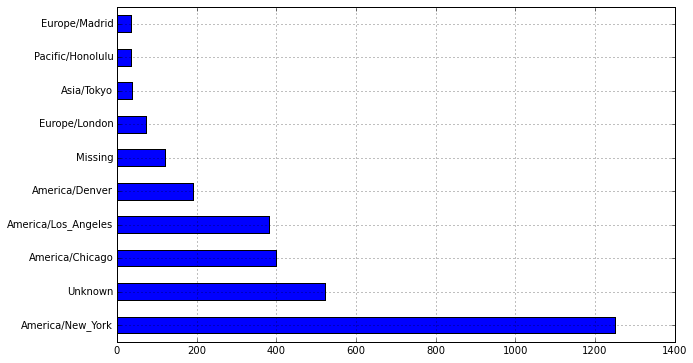

In [33]:
tz_counts[:10].plot(kind='barh', rot=0)

#### "agent" string

In [34]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [35]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [36]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [37]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [38]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

### Windows and non-Windows users 구분 시키기

In [39]:
# agent string 에서 Data 가 missing 난 것들 제거하기
cframe = frame[frame.a.notnull()] # notnull() 의 반환값은 T/F

In [40]:
# 'a'필드에서 string에 Windows가 포함되어 있으면, T, F
operating_system = np.where(cframe['a'].str.contains('Windows'),
                            'Windows', 'Not Windows')
operating_system[:5] # list

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

### tz, os로 그룹시키기

In [41]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [42]:
by_tz_os

#### aggregate를 구해 -> size(), 컬럼으로 나열 -> unstack() [아직은 정렬되지 않았음]

In [43]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


#### 정렬시키기

In [44]:
# Use to sort in ascending order
indexer = agg_counts.sum(1).argsort() # sum에서 1은 column, argsort() -> index값 반환
indexer[:10] # indirect index array

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [45]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [46]:
plt.figure()

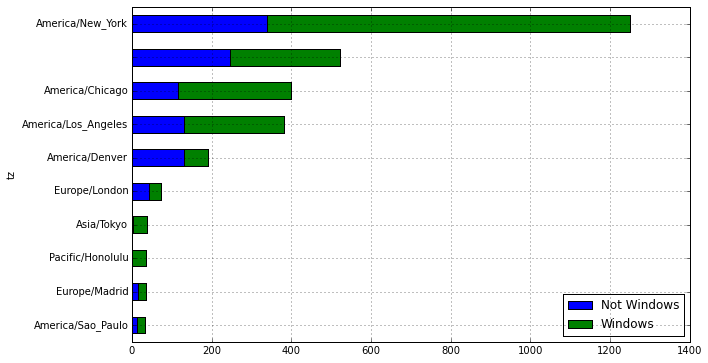

In [47]:
count_subset.plot(kind='barh', stacked=True)

In [48]:
plt.figure()

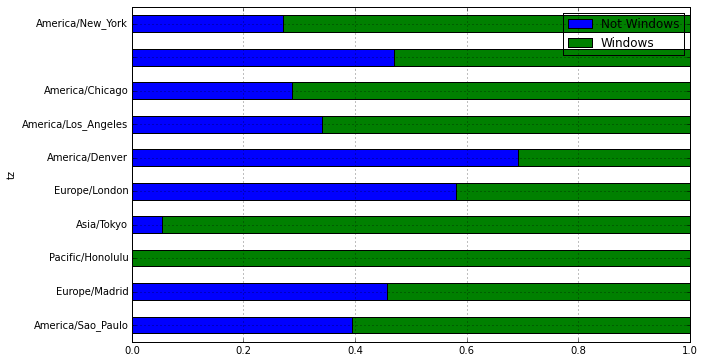

In [49]:
normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

## <div style="font-weight: bold; color: blue">Exercise 2. MovieLens 1M data set </div>

### 2.1 users, ratings, movies data 추출하기

In [50]:
%pwd

u'/home/kwangyounjung/Workspace/python-study/study_session/book/python_for_data_analysis'

In [51]:
import pandas as pd
# encoding = 'latin1',  교재에는 없음

# path 수정하기
upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']
`
users = pd.read_csv(upath, sep='::', header=None, names=unames) #, encoding=encoding
ratings = pd.read_csv(rpath, sep='::', header=None, names=rnames)
movies = pd.read_csv(mpath, sep='::', header=None, names=mnames)

/home/kwangyounjung/.virtualenvs/study-ex/local/lib/python2.7/site-packages/pandas/io/parsers.py:639: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators; you can avoid this warning by specifying engine='python'.
  ParserWarning)


In [52]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [53]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [54]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


### 2.2 세 개의 테이블을 하나의 테이블로 합치기(merge, pandas는 어떤 컬럼을 key로 할지 추측)

In [55]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [56]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

### 2.3 남녀에 따른 영화의 평점 평균 구하기

In [57]:
mean_ratings = data.pivot_table('rating', rows='title',
                                cols='gender', aggfunc='mean')
mean_ratings[:10]

/home/kwangyounjung/.virtualenvs/study-ex/local/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'cols' keyword is deprecated, use 'columns' instead
  warnings.warn(msg, FutureWarning)
/home/kwangyounjung/.virtualenvs/study-ex/local/lib/python2.7/site-packages/pandas/util/decorators.py:81: FutureWarning: the 'rows' keyword is deprecated, use 'index' instead
  warnings.warn(msg, FutureWarning)


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


### 2.4 평점을 받은 영화 건수 파악하기

In [58]:
ratings_by_title = data.groupby('title').size()

In [59]:
ratings_by_title[:5]

title
$1,000,000 Duck (1971)            37
'Night Mother (1986)              70
'Til There Was You (1997)         52
'burbs, The (1989)               303
...And Justice for All (1979)    199
dtype: int64

#### population >= 250 으로 제한 -> active_titles

In [60]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]

In [61]:
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)'], dtype='object')

In [62]:
mean_ratings = mean_ratings.ix[active_titles]
mean_ratings

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [63]:
# 책에 나와있지 않음
mean_ratings = mean_ratings.rename(index={'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                           'Seven Samurai (Shichinin no samurai) (1954)'})

#### Female 기준으로, Descending 정렬

In [64]:
top_female_ratings = mean_ratings.sort_index(by='F', ascending=False) # descending
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### 2.5 Measuring rating disagreement (남녀 평균 평점의 차이)

In [65]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

In [66]:
sorted_by_diff = mean_ratings.sort_index(by='diff')
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [67]:
# Reverse order of rows, take first 15 rows
sorted_by_diff[::-1][:15] # ::?

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [1]:
# Standard deviation of rating grouped by title
rating_std_by_title = data.groupby('title')['rating'].std()

# # Filter down to active_titles
# rating_std_by_title = rating_std_by_title.ix[active_titles]

# # Order Series by value in descending order
# rating_std_by_title.order(ascending=False)[:10]

NameError: name 'data' is not defined

## <div style="font-weight: bold; color: blue">Exercise 3. US Baby Names 1880-2010</font>

In [69]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 5))
np.set_printoptions(precision=4)
%pwd

u'/home/kwangyounjung/Workspace/python-study/study_session/book/python_for_data_analysis'

http://www.ssa.gov/oact/babynames/limits.html

### 3.1 데이터 파일 확인해보기

In [70]:
# 경로 수정
!head -n 10 ch02/names/yob1880.txt

In [71]:
# 경로 수정
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names=['name', 'sex', 'births'])
names1880[:10]

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [72]:
names1880.groupby('sex').births.sum()

sex
F       90993
M      110493
Name: births, dtype: int64

### 3.2 All Data(1880-2010)를 하나의 객체로 합치기(names)

In [73]:
# 2010 is the last available year right now
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' % year # 경로 수정
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year # Column added
    pieces.append(frame) # List에 추가

# frame
# pieces # list 출력
    
# Concatenate everything into a single DataFrame
# 1. row-wise로 DataFrame 객체 합치기
# 2. ignore_index - 기존 row number 무시
names = pd.concat(pieces, ignore_index=True)
names

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


### 3.3 Pivot table (year, sex)

In [74]:
total_births = names.pivot_table('births', rows='year',
                                 cols='sex', aggfunc=sum)

In [75]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


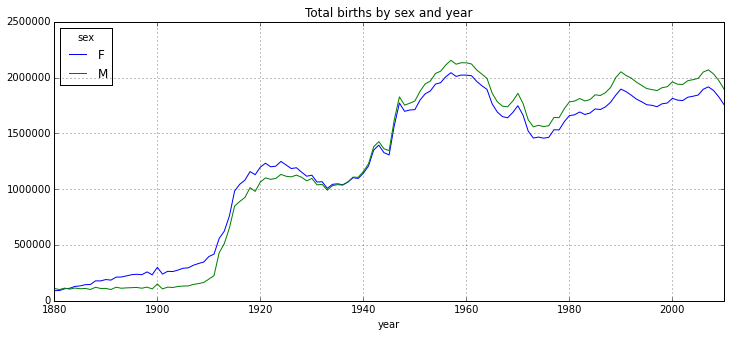

In [76]:
total_births.plot(title='Total births by sex and year')

### 3.4 prop 컬럼 추가하기 - 개별 이름에 대한 비율계산 (births / births.sum())

In [77]:
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float)

    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_prop)

In [78]:
# Sanity check - 1에 가까운지 체크
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [79]:
names

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [80]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
# grouped # DataFrameGroupBy object
top1000 = grouped.apply(get_top1000)
top1000

name sex  births  year      prop
year sex                                               
1880 F   0             Mary   F    7065  1880  0.077643
         1             Anna   F    2604  1880  0.028618
         2             Emma   F    2003  1880  0.022013
         3        Elizabeth   F    1939  1880  0.021309
         4           Minnie   F    1746  1880  0.019188
         5         Margaret   F    1578  1880  0.017342
         6              Ida   F    1472  1880  0.016177
         7            Alice   F    1414  1880  0.015540
         8           Bertha   F    1320  1880  0.014507
         9            Sarah   F    1288  1880  0.014155
         10           Annie   F    1258  1880  0.013825
         11           Clara   F    1226  1880  0.013474
         12            Ella   F    1156  1880  0.012704
         13        Florence   F    1063  1880  0.011682
         14            Cora   F    1045  1880  0.011484
         15          Martha   F    1040  1880  0.011429
         16           Laura   F    1012  1880  0.011122
         17          Nellie   F     995  1880  0.010935
         18           Grace   F     982  1880  0.010792
         19          Carrie   F     949  1880  0.010429
         20           Maude   F     858  1880  0.009429
         21           Mabel   F     808  1880  0.008880
         22          Bessie   F     794  1880  0.008726
         23          Jennie   F     793  1880  0.008715
         24        Gertrude   F     787  1880  0.008649
         25           Julia   F     783  1880  0.008605
         26          Hattie   F     769  1880  0.008451
         27           Edith   F     768  1880  0.008440
         28          Mattie   F     704  1880  0.007737
         29            Rose   F     700  1880  0.007693
...                     ...  ..     ...   ...       ...
2010 M   1677617       Yair   M     201  2010  0.000106
         1677616      Talan   M     201  2010  0.000106
         1677614      Keyon   M     201  2010  0.000106
         1677613       Kael   M     201  2010  0.000106
         1677618   Demarion   M     200  2010  0.000105
         1677619     Gibson   M     200  2010  0.000105
         1677620     Reagan   M     200  2010  0.000105
         1677621  Cristofer   M     199  2010  0.000105
         1677622     Daylen   M     199  2010  0.000105
         1677623     Jordon   M     199  2010  0.000105
         1677624    Dashawn   M     198  2010  0.000104
         1677625      Masen   M     198  2010  0.000104
         1677629      Rowen   M     197  2010  0.000104
         1677631     Yousef   M     197  2010  0.000104
         1677630   Thaddeus   M     197  2010  0.000104
         1677628      Kadin   M     197  2010  0.000104
         1677627     Dillan   M     197  2010  0.000104
         1677626   Clarence   M     197  2010  0.000104
         1677634      Slade   M     196  2010  0.000103
         1677632    Clinton   M     196  2010  0.000103
         1677633    Sheldon   M     196  2010  0.000103
         1677636    Keshawn   M     195  2010  0.000103
         1677637   Menachem   M     195  2010  0.000103
         1677635     Joziah   M     195  2010  0.000103
         1677638     Bailey   M     194  2010  0.000102
         1677639     Camilo   M     194  2010  0.000102
         1677640     Destin   M     194  2010  0.000102
         1677641     Jaquan   M     194  2010  0.000102
         1677642     Jaydan   M     194  2010  0.000102
         1677645     Maxton   M     193  2010  0.000102

[261877 rows x 5 columns]

### 3.5 DIY approach - top1000\

In [81]:
pieces = []
for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by='births', ascending=False)[:1000])
top1000 = pd.concat(pieces, ignore_index=True)

In [82]:
top1000

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### 3.6 Analyzing naming trends :: 이름의 트렌드(추세) 분석

In [83]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [84]:
total_births = top1000.pivot_table('births', rows='year', cols='name',
                                   aggfunc=sum).fillna(0) # fillna 추가
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,0,0,0,102,0,0,0,0,0,71,...,8,23,0,0,7,0,8,28,27,0
1881,0,0,0,94,0,0,0,0,0,81,...,0,22,0,0,10,0,9,21,27,0
1882,0,0,0,85,0,0,0,0,0,80,...,8,25,0,0,9,0,17,32,21,0
1883,0,0,0,105,0,0,0,0,0,79,...,0,23,0,0,10,0,11,35,25,0
1884,0,0,0,97,0,0,0,0,0,98,...,13,31,0,0,14,6,8,58,27,0
1885,0,0,0,88,0,6,0,0,0,88,...,6,27,0,0,12,6,14,48,38,0
1886,0,0,0,86,0,0,0,0,0,84,...,13,25,0,0,8,0,20,52,43,0
1887,0,0,0,78,0,0,0,0,0,104,...,9,34,0,0,23,0,28,46,33,0
1888,0,0,0,90,0,0,0,0,0,137,...,11,42,0,0,23,7,30,42,45,0


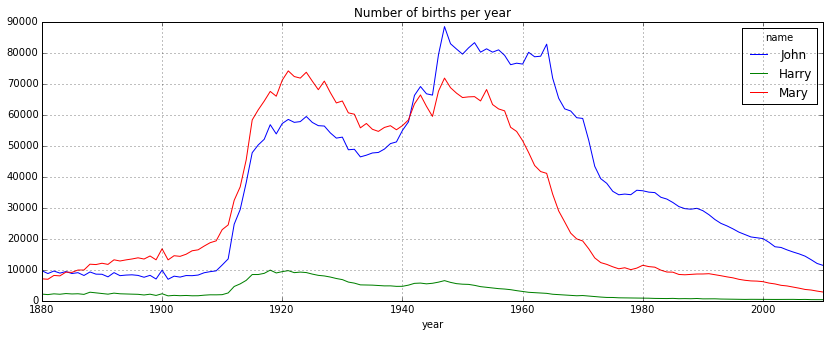

In [85]:
subset = total_births[['John', 'Harry', 'Mary']] # 'Marilyn' is not in index.
# subplots=True, grid=False
subset.plot(subplots=False, figsize=(14, 5), grid=True,
            title="Number of births per year")

### 3.7 Measuring the increase in naming diversity :: 이름 다양성에 대한 증감 측정

##### John, Harry, Mary 라는 이름이 줄어드는 이유는 부모님들이 흔한 이름을 선택하지 않았기 때문이라고 설명할 수 있다. 이 가설은 1,000명의 가장 인기있는 이름의 비율을 보며 확인할 수 있다.

In [86]:
plt.figure()

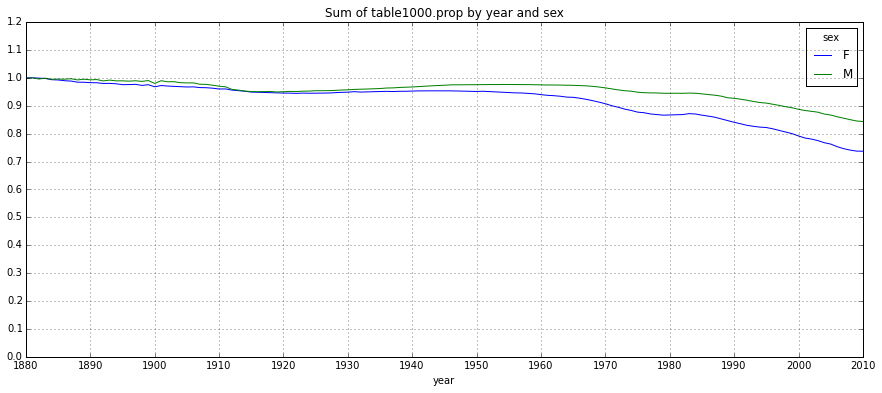

In [87]:
table = top1000.pivot_table('prop', rows='year',
                            cols='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex', figsize=(15, 6),
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

##### 위 차트를 보면 상위 1,000개의 이름의 전체적인 비율이 떨어지는 것을 통해 이름 다양성(name diversity)가 증가하고 있음을 알 수 있다.

### 3.8 top1000에서 상위 50%를 차지하는 양을 통해 이름 다양성을 파악하자

In [88]:
# 우선 boys에서 2010년도 자료만 찾아보자
df = boys[boys.year == 2010] # boys = top1000[top1000.sex == 'M']
df

,name,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [89]:
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
260887    0.097648
260888    0.105406
260889    0.112852
260890    0.120276
260891    0.127672
...
261861    0.841718
261860    0.841822
261859    0.841926
261865    0.842029
261866    0.842132
261867    0.842236
261868    0.842338
261869    0.842441
261870    0.842544
261871    0.842646
261872    0.842748
261873    0.842850
261874    0.842953
261875    0.843055
261876    0.843156
Name: prop, Length: 1000, dtype: float64

In [90]:
prop_cumsum.values.searchsorted(0.5)
# prop_cumsum.searchsorted(0.5) # array

116

In [91]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [92]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
# diversity.head()
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


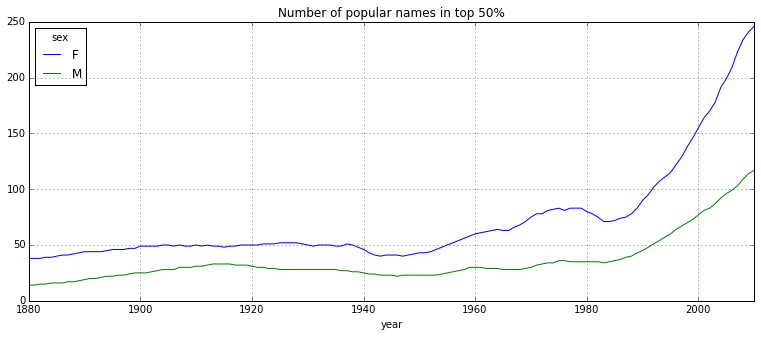

In [93]:
diversity.plot(title="Number of popular names in top 50%", figsize=(13,5))

### 3.9 The "Last letter" Revolution - 마지막 글자로 데이터 분석해보기

In [94]:
# extract last letter from name column
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'
last_letters
table = names.pivot_table('births', rows=last_letters,
                          cols=['sex', 'year'], aggfunc=sum).fillna(0)
table

sex              F                                                          \
year          1880   1881   1882   1883   1884   1885   1886   1887   1888   
last_letter                                                                  
a            31446  31581  36536  38330  43680  45408  49100  48942  59442   
b                0      0      0      0      0      0      0      0      0   
c                0      0      5      5      0      0      0      0      0   
d              609    607    734    810    916    862   1007   1027   1298   
e            33378  34080  40399  41914  48089  49616  53884  54353  66750   
f                0      0      0      0      0      0      0      0      0   
g                7      5     12      8     24     11     18     25     44   
h             4863   4784   5567   5701   6602   6624   7146   7141   8630   
i               61     78     81     76     84     92     85    105    141   
j                0      0      0      0      0      0      0      0      0   
k               13     15     11     17     21     18     27     19     21   
l             2541   2911   3527   3848   4808   5144   5721   6175   7900   
m               58     57     81     86     79     75    103     90    123   
n             3008   2959   3576   3837   4507   4735   5242   5512   6833   
o               30     49     35     47     74     84     93     97    134   
p                0      0      0      0      0      0      0      0      0   
q                0      0      0      0      0      0      0      0      0   
r              481    417    590    640    718    799    917    910   1207   
s             1391   1316   1637   1794   2039   2127   2524   2803   3582   
t             2152   2165   2399   2554   2825   2889   3017   3140   3816   
u              380    427    410    444    490    495    511    476    541   
v                0      0      0      0      0      0      0      0      0   
w                0      5      0      0      0      0      5      0      0   
x                0      0      0      7      0      0      0      0      0   
y            10469  10404  12145  12063  13917  13927  14936  14980  17931   
z              106     95    106    141    148    150    202    188    238   

sex                  ...         M                                          \
year          1889   ...      2001    2002    2003    2004    2005    2006   
last_letter          ...                                                     
a            58631   ...     39124   38815   37825   38650   36838   36156   
b                0   ...     50950   49284   48065   45914   43144   42600   
c                0   ...     27113   27238   27697   26778   26078   26635   
d             1374   ...     60838   55829   53391   51754   50670   51410   
e            66663   ...    145395  144651  144769  142098  141123  142999   
f                0   ...      1758    1817    1819    1904    1985    1968   
g               28   ...      2151    2084    2009    1837    1882    1929   
h             8826   ...     85959   88085   88226   89620   92497   98477   
i              134   ...     20980   23610   26011   28500   31317   33558   
j                0   ...      1069    1088    1203    1094    1291    1241   
k               22   ...     42477   42043   42296   41400   42151   42537   
l             8395   ...    153648  153493  153862  152800  155312  156234   
m              137   ...     41967   42663   42790   43054   41600   42503   
n             7103   ...    616099  630322  663419  676011  686326  720998   
o              142   ...     82146   83180   85423   88822   92001   96350   
p                0   ...      3419    3157    2982    2841    2768    2721   
q                0   ...       602     618     585     523     446     430   
r             1214   ...    165377  164821  169878  169452  172069  176490   
s             3569   ...    143791  139595  138632  139642  139913  143232   
t             3784   

#### 3.9.1 1910, 1960, 2010년도 마지막 글자 비율 그래프

In [95]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()
subtable.sum()
subtable

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108376  691247  670605    977    5204   28438
b                 0     694     450    411    3912   38859
c                 5      49     946    482   15476   23125
d              6750    3729    2607  22111  262112   44398
e            133569  435013  313833  28655  178823  129012
f                 0      20      97    152    9224    2255
g                57     318     657    437   20235    2666
h             20427   73247  133424   8848   80841   98090
i               605   80812   55820    164    1286   42956
j                 0       0     159      0       0    1459
k                48     315     626   7104  105315   35198
l             17121   68482   46360  12626  223716  133583
m               476   17417    4552  11272   72139   46808
n             31412  264258  246631  27851  325266  688677
o               658    4932    2187   3314   27358   81025
p                 7      47      35    616   12102    2409
q                 0       0      53      0       0     342
r              5308   13677   31707  12522   66183  166064
s             15477   25810   23451  25404  219080  123670
t             10877   30738   13773  14153  140015   43398
u               271    1161     734     24     122    2318
v                 0     122     205     22      78    2723
w                 8      63    2080   1229   16444   30656
x                 6      74    1279    770    3947   16352
y             43991  308504  205501  15021  343318  110425
z               967    1333    1238     33     392    3476

In [96]:
letter_prop = subtable / subtable.sum().astype(float)

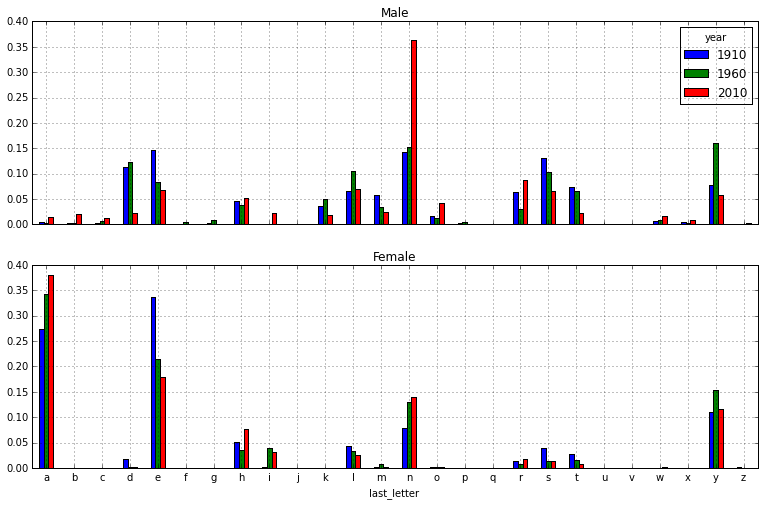

In [97]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(13, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

##### 남자 이름 마지막 글자가 'n'인 것이 1960년에 비해 2010년에 급격하게 증가하는 것을 확인할 수 있다.

#### 3.9.2 마지막 글자 d, n, y로 끝나는 남자 이름의 비율에 대한 시계열 분석

In [98]:
letter_prop = table / table.sum().astype(float)

dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


In [99]:
plt.close('all')

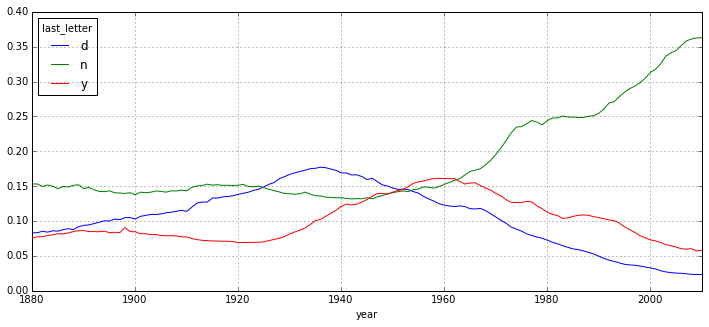

In [100]:
dny_ts.plot()

### Another fun trend - Boy names that became girl names (and vice versa)

#### Example - Lesley or Leslie

In [101]:
all_names = top1000.name.unique()
# all_names
mask = np.array(['lesl' in x.lower() for x in all_names])
# mask = T/F
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [102]:
filtered = top1000[top1000.name.isin(lesley_like)]
# filtered.groupby('name').births.sum()
filtered

,name,sex,births,year,prop
632,Leslie,F,8,1880,0.000088
1108,Leslie,M,79,1880,0.000715
2462,Leslie,F,11,1881,0.000120
3014,Leslie,M,92,1881,0.000913
4512,Leslie,F,9,1882,0.000083
4995,Leslie,M,122,1882,0.001073
5723,Lesley,M,6,1882,0.000053
6641,Leslie,F,7,1883,0.000062
6986,Leslie,M,120,1883,0.001147
7785,Lesley,M,5,1883,0.000048


In [103]:
table = filtered.pivot_table('births', rows='year',
                             cols='sex', aggfunc='sum').fillna(0)
table = table.div(table.sum(1), axis=0) # F+M=1
table

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


In [104]:
plt.close('all')

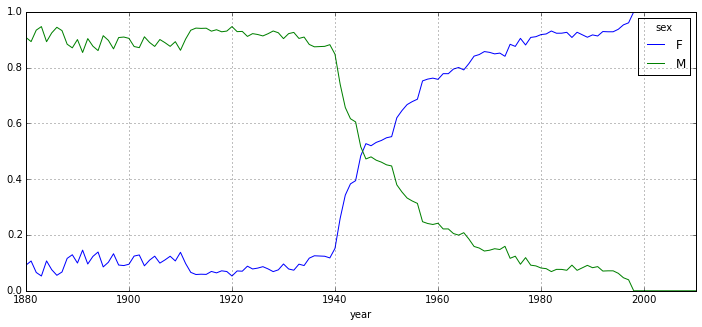

In [105]:
# table.plot(style={'M': 'k-', 'F': 'k--'})
table.plot()